In [1]:
# # Deep Learning Quick Reference Chapter 2: Using Deep Learning To Solve Regression Problems
# # Mike Bernico <mike.bernico@gmail.com>

# # random seed setting for reproducibility
from numpy.random import seed
seed(42)
# from tensorflow import set_random_seed
# set_random_seed(42)

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras.models import Model
                        #Sequential
from keras.layers import Input, Dense
from sklearn.metrics import mean_absolute_error
import seaborn as sns
from matplotlib import pyplot as plt    # import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import load_model
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [3]:
TRAIN_DATA = "./data/train/train_data.csv"
VAL_DATA = "./data/val/val_data.csv"
TEST_DATA = "./data/test/test_data.csv"

def load_data():
    """Loads train, val, and test datasets from disk"""
    train = pd.read_csv(TRAIN_DATA)
    val = pd.read_csv(VAL_DATA)
    test = pd.read_csv(TEST_DATA)

    # we will use sklearn's StandardScaler to scale our data to 0 mean, unit variance.
    scaler = StandardScaler()
    train = scaler.fit_transform(train)
    val = scaler.transform(val)
    test = scaler.transform(test)
    # we will use a dict to keep all this data tidy.
    data = dict()

    data["train_y"] = train[:, 10]
    data["train_X"] = train[:, 0:9]
    data["val_y"] = val[:, 10]
    data["val_X"] = val[:, 0:9]
    data["test_y"] = test[:, 10]
    data["test_X"] = test[:, 0:9]
    # it's a good idea to keep the scaler (or at least the mean/variance) so we can unscale predictions
    data["scaler"] = scaler
    return data

In [4]:
# keras_김태영

# # 1. 데이터셋 준비하기
# x_train = np.random.random((1000, 12))
# y_train = np.random.randint(10, size=(1000, 1))
# y_train = to_categorical(y_train, num_classes=10) # one-hot 인코딩
# x_test = np.random.random((100, 12))
# y_test = np.random.randint(10, size=(100, 1))
# y_test = to_categorical(y_test, num_classes=10) # one-hot 인코딩

# # 2. 모델 구성하기
# model = Sequential()
# model.add(Dense(64, input_dim=12, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(10, activation='softmax'))

# # 3. 모델 학습과정 설정하기
# model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [4]:
def build_network(input_features=None):
    # first we specify an input layer, with a shape == features
    inputs = Input(shape=(input_features,), name="input")
    # 32 neuron hidden layer
    x = Dense(32, activation='relu', name="hidden")(inputs)
    x = Dense(32, activation='relu', name="hidden2")(x)
    x = Dense(32, activation='relu', name="hidden3")(x)
    x = Dense(32, activation='relu', name="hidden4")(x)
    x = Dense(16, activation='relu', name="hidden5")(x)
    # for regression we will use a single neuron with linear (no) activation
    prediction = Dense(1, activation='linear', name="final")(x)

    model = Model(inputs=inputs, outputs=prediction)
    model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['accuracy']) # softmax 없음 => accuracy 없음
    return model

In [5]:
def create_callbacks(): 
    tensorboard_callback = TensorBoard(log_dir='/root/ch3_tb_log/mlp', histogram_freq=1, batch_size=32,
                                       write_graph=True, write_grads=False)

    return [tensorboard_callback]
# tensorboard는 log_dir 위치를  mkdir 위치로 맞추고, --bind_all 옵션을 주어야 크롬에서 나타남
# container root>tensorboard --logdir /root/ch3_tb_log/mlp --port 6006 --bind_all
# 크롬 url ==>  127.0.0.1:6006
#     tensorboard_callback = TensorBoard(log_dir=os.path.join(os.getcwd(), "tb_log", "5h_adam_20epochs"), histogram_freq=1, batch_size=32,
#                                        write_graph=True, write_grads=False)

In [6]:
 def main():
    data = load_data()

    # Network with single 32 neuron hidden layer...
    input_features = data["train_X"].shape[1]
    model = build_network(input_features=input_features)
    print("Network Structure")
    print(model.summary())
    print("Training Data Shape: " + str(data["train_X"].shape))
    
    callbacks=create_callbacks()
    hist=model.fit(x=data["train_X"], y=data["train_y"], batch_size=32, epochs=30, verbose=1,
              validation_data=(data["val_X"], data["val_y"]), callbacks=callbacks)
    # sklearn metrics 함수 이용
    print("Model Train MAE: " + str(mean_absolute_error(data["train_y"], model.predict(data["train_X"]))))
    print("Model Val MAE: " + str(mean_absolute_error(data["val_y"], model.predict(data["val_X"]))))
    
    #학습과정 살펴보기
    fig, loss_ax = plt.subplots()
    acc_ax = loss_ax.twinx()
    loss_ax.set_ylim([0.0, 3.0])
    acc_ax.set_ylim([0.0, 1.0])

    loss_ax.plot(hist.history['loss'], 'y', label='train loss')
    acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
    
    loss_ax.plot(hist.history['val_loss'], 'r', label='val_loss')
    acc_ax.plot(hist.history['val_accuracy'], 'g', label='val_acc')

    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    acc_ax.set_ylabel('accuray')

    loss_ax.legend(loc='upper left')
    acc_ax.legend(loc='lower left')

    plt.show()
    
    # an example of saving the model for later use
    model.save("regression_model.h5")
    # use model = model.load("regression_model.h5") to load

Network Structure
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 9)                 0         
_________________________________________________________________
hidden (Dense)               (None, 32)                320       
_________________________________________________________________
hidden2 (Dense)              (None, 32)                1056      
_________________________________________________________________
hidden3 (Dense)              (None, 32)                1056      
_________________________________________________________________
hidden4 (Dense)              (None, 32)                1056      
_________________________________________________________________
hidden5 (Dense)              (None, 16)                528       
_________________________________________________________________
final (Dense)                (None, 1)   

/usr/local/lib/python3.6/dist-packages/keras/callbacks/tensorboard_v2.py:92: UserWarning: The TensorBoard callback `batch_size` argument (for histogram computation) is deprecated with TensorFlow 2.0. It will be ignored.
  warnings.warn('The TensorBoard callback `batch_size` argument '


Train on 3918 samples, validate on 490 samples
Epoch 1/30
 480/3918 [==>...........................] - ETA: 34s - loss: 0.8040 - accuracy: 0.0000e+00

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.372059). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.133615). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


3918/3918 [==============================] - 7s 2ms/step - loss: 0.4836 - accuracy: 0.0000e+00 - val_loss: 0.3519 - val_accuracy: 0.0000e+00
Epoch 2/30
3918/3918 [==============================] - 2s 485us/step - loss: 0.3064 - accuracy: 0.0000e+00 - val_loss: 0.2908 - val_accuracy: 0.0000e+00
Epoch 3/30
3918/3918 [==============================] - 2s 472us/step - loss: 0.2637 - accuracy: 0.0000e+00 - val_loss: 0.2555 - val_accuracy: 0.0000e+00
Epoch 4/30
3918/3918 [==============================] - 2s 467us/step - loss: 0.2390 - accuracy: 0.0000e+00 - val_loss: 0.2519 - val_accuracy: 0.0000e+00
Epoch 5/30
3918/3918 [==============================] - 2s 471us/step - loss: 0.2272 - accuracy: 0.0000e+00 - val_loss: 0.2499 - val_accuracy: 0.0000e+00
Epoch 6/30
3918/3918 [==============================] - 2s 493us/step - loss: 0.2201 - accuracy: 0.0000e+00 - val_loss: 0.2487 - val_accuracy: 0.0000e+00
Epoch 7/30
3918/3918 [==============================] - 2s 488us/step - loss: 0.2144 - ac

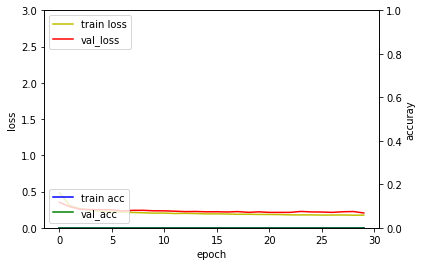

In [7]:
main()

In [9]:
# # 5. 김태영keras 학습과정 살펴보기
# def hist_plot():
#     hist=load_model("regression_model.h5")
#     fig, loss_ax = plt.subplots()
#     acc_ax = loss_ax.twinx()
#     loss_ax.set_ylim([0.0, 3.0])
#     acc_ax.set_ylim([0.0, 1.0])

#     loss_ax.plot(hist.history['loss'], 'y', label='train loss')  # 'Model' object has no attribute 'history'
#     acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
#     loss_ax.plot(hist.history['val_loss'], 'r', label='val_loss')
#     acc_ax.plot(hist.history['val_accuracy'], 'g', label='val_acc')

#     loss_ax.set_xlabel('epoch')
#     loss_ax.set_ylabel('loss')
#     acc_ax.set_ylabel('accuray')
#     loss_ax.legend(loc='upper left')
#     acc_ax.legend(loc='lower left')
#     plt.show()
# hist_plot()

Model Test MAE: 0.2074264144288624


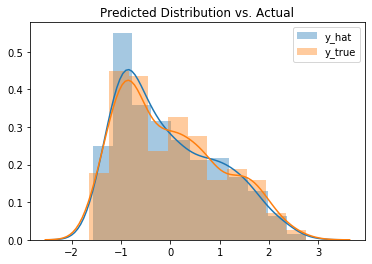

In [8]:
# 6. 모델 평가하기(error)
def model_eval():
    data = load_data()
    
    model=load_model("regression_model.h5")

#     loss_and_metrics = model.evaluate(test_X, test_y, batch_size=32) # NameError: name 'test_X' is not defined
#     print('loss_and_metrics : ' + str(loss_and_metrics))
    
    print("Model Test MAE: " + str(mean_absolute_error(data["test_y"], model.predict(data["test_X"]))))   

    plt.title("Predicted Distribution vs. Actual")
    y_hat = model.predict(data["test_X"])
    sns.distplot(y_hat.flatten(), label="y_hat")
    sns.distplot(data["test_y"], label="y_true")
    plt.legend()
    plt.savefig("pred_dist_deep_me.jpg")
    
model_eval()
